In [1]:
#For Kaggle
#date=''

#For WL data
source='WL'
date='20241118'

saveImage=False

print('done')

done


In [2]:
import sys
import os
from importlib import reload
fpath = os.path.join('..//scripts')
sys.path.append(fpath)

import warnings
warnings.filterwarnings('ignore')

#loading internal scripts
import frauddetection as fd
import sourcedata as sd
import dataimport as di
import result as resultMd
reload(fd)
reload(sd)
reload(di)
reload(resultMd)

print('done')

done


In [3]:
import pandas as pd

dfTrx = pd.read_csv('../data/cleaned/'+source+'export'+date+'.csv')
dfTrx.head(5)

,db_uuid,trx_date_time,term_mcc,term_country,mcd_fraud_score,vaa_score,trx_cnp,card_pan_id,Class,ecom,...,clusterCardHolder_cluster3,clusterCardHolder_cluster4,clusterMerchant_M0,clusterMerchant_M1,clusterMerchant_M2,clusterMerchant_M3,clusterMerchant_UNKNOWN,trx_amount_log10,previous_trx,distancePrevTrx
0,31BD8D38A53C11EFABA49D2778D26ADA,2024-11-18 00:29:22,5499,NLD,214.000000,26.258093,1,450280D96024C965163D7F15687156B138E1BDCB6DC512...,0,1,...,0,0,1,0,0,0,0,1.690107,0,1.1
1,A3E698CEA53B11EFABA49D2778D26ADA,2024-11-18 00:27:12,5499,NLD,225.222235,32.000000,1,68B7CAD29BF263AD2CE80B155DD3D3EE783884F72F7070...,0,1,...,0,0,1,0,0,0,0,1.799272,0,1.1
2,C5D7AAE6A53A11EFAAA0DF784AB5695E,2024-11-18 00:20:15,7011,BEL,152.000000,26.258093,0,02587C2F031D3D22C997A9A4E6CB78D6A87A2C73E61131...,0,1,...,0,0,0,0,0,1,0,1.374015,0,1.0
3,9C87AE3EA53F11EFABA49D2778D26ADA,2024-11-18 00:53:48,5542,BEL,225.222235,26.258093,1,CD32793A75DE03806C854CB3B6C2DF5BB2809C2DA66BA9...,0,1,...,0,1,0,0,0,1,0,1.205204,0,1.0
4,9C87B0B4A53F11EFABA49D2778D26ADA,2024-11-18 00:53:48,5542,BEL,225.222235,26.258093,1,CD32793A75DE03806C854CB3B6C2DF5BB2809C2DA66BA9...,0,1,...,0,1,0,0,0,1,0,1.205204,0,1.1


Duration  443.197208
test-set confusion matrix:
 [[211695     27]
 [   223     25]]
accuracy score: 0.9988
balanced accuracy score: 0.5503
recall score: 0.1008
precision score: 0.4808
f1 score: 0.1667
mcc score: 0.2198
roc auc score: 0.5503
test-set confusion matrix:
 [[846877      8]
 [   787    207]]
accuracy score: 0.9991
balanced accuracy score: 0.6041
recall score: 0.2082
precision score: 0.9628
f1 score: 0.3424
mcc score: 0.4475
roc auc score: 0.6041
test-set confusion matrix:
 [[211695     27]
 [   223     25]]
accuracy score: 0.9988
balanced accuracy score: 0.5503
recall score: 0.1008
precision score: 0.4808
f1 score: 0.1667
mcc score: 0.2198
roc auc score: 0.5503


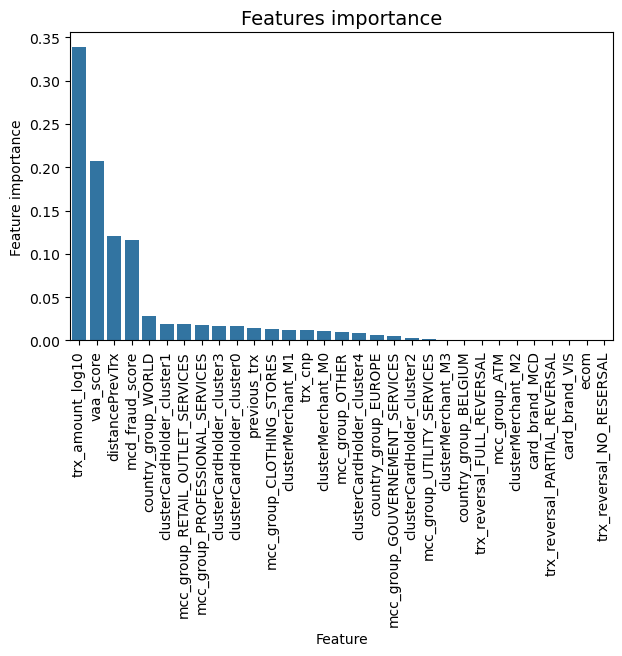

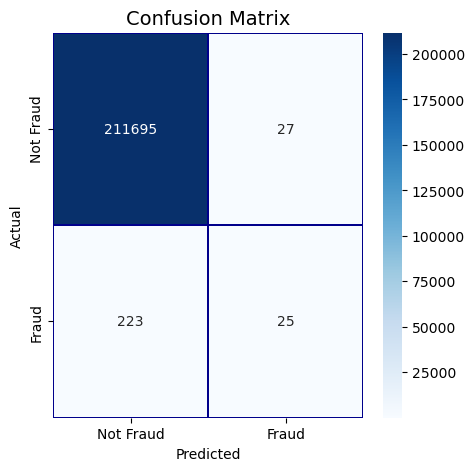

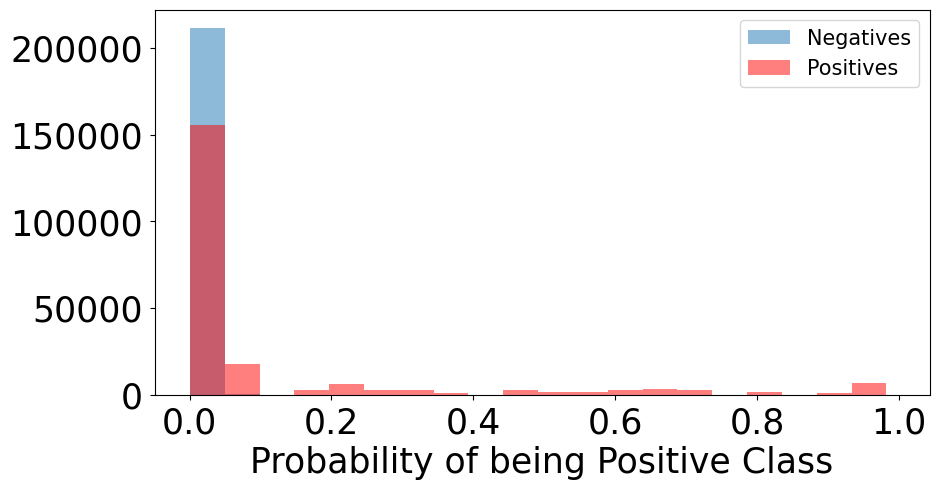

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from datetime import datetime

then= datetime.now()
predictors = fd.getPredictors(dfTrx)

x_train, x_test, y_train, y_test, scaler =fd.split_data(dfTrx,predictors)

modelClf = GradientBoostingClassifier(random_state=42)
parameters={'learning_rate': 0.01, 'n_estimators':110, 'max_depth':8}
modelClf.set_params(**parameters)

modelClf.fit(x_train, y_train)
predsTrain = modelClf.predict(x_train)
predsTest = modelClf.predict(x_test)

now = datetime.now()
duration= now - then
duration_in_s = duration.total_seconds()
print("Duration ",duration_in_s)
#resultMd.update_time_response_result('07-sklearn.ensemble.b-boosting','GradientBoostingClassifier','2-After tuning', duration_in_s)
f1,mcc,roc=fd.print_scores(y_test, predsTest,'all')
#resultMd.update_performance_test_result('07-sklearn.ensemble.b-boosting','GradientBoostingClassifier','2-After tuning', f1,mcc,roc)

fd.print_scores(y_train, predsTrain,'f1', False)
fd.print_scores(y_test, predsTest,'f1')
fd.show_importance(modelClf, predictors)
fd.show_confusion_matrix(y_test, predsTest)
fd.show_prediction_graph(modelClf, x_test,y_test,'../imgs/FD07C-GradientBoostingClassifierProbaHistogram' if saveImage else None)



--- threshold -- 0.025
test-set confusion matrix:
 [[211140    582]
 [   153     95]]
accuracy score: 0.9965
balanced accuracy score: 0.6902
recall score: 0.3831
precision score: 0.1403
f1 score: 0.2054
mcc score: 0.2304
roc auc score: 0.6902
--- threshold -- 0.05
test-set confusion matrix:
 [[211493    229]
 [   182     66]]
accuracy score: 0.9981
balanced accuracy score: 0.6325
recall score: 0.2661
precision score: 0.2237
f1 score: 0.2431
mcc score: 0.2430
roc auc score: 0.6325
--- threshold -- 0.1
test-set confusion matrix:
 [[211633     89]
 [   203     45]]
accuracy score: 0.9986
balanced accuracy score: 0.5905
recall score: 0.1815
precision score: 0.3358
f1 score: 0.2356
mcc score: 0.2462
roc auc score: 0.5905
--- threshold -- 0.15
test-set confusion matrix:
 [[211656     66]
 [   203     45]]
accuracy score: 0.9987
balanced accuracy score: 0.5906
recall score: 0.1815
precision score: 0.4054
f1 score: 0.2507
mcc score: 0.2707
roc auc score: 0.5906
--- threshold -- 0.2
test-set co

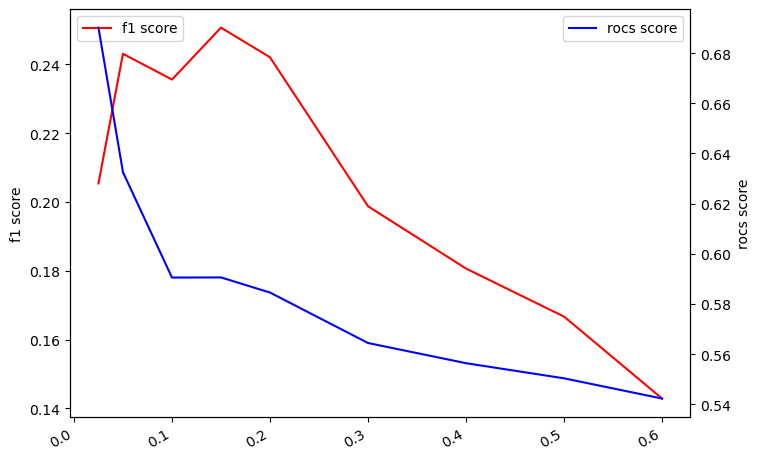

In [9]:
y_pred_prob = modelClf.predict_proba(x_test)[:,1]

range = []
f1s = []
rocs = []
for threshold  in [0.025,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6]:
    print("--- threshold --", threshold)
    y_pred_adjusted = (y_pred_prob>threshold).astype(int)
    f1,mcc,roc=fd.print_scores(y_test, y_pred_adjusted,'all')
    range.append(threshold)
    f1s.append(f1)
    rocs.append(roc)

fd.plt_train_test(range, f1s,"f1 score",rocs,"rocs score")

export20241118.csv
test-set confusion matrix:
 [[1058434     173]
 [    858     384]]
accuracy score: 0.9990
balanced accuracy score: 0.6545
recall score: 0.3092
precision score: 0.6894
f1 score: 0.4269
mcc score: 0.4613
roc auc score: 0.6545


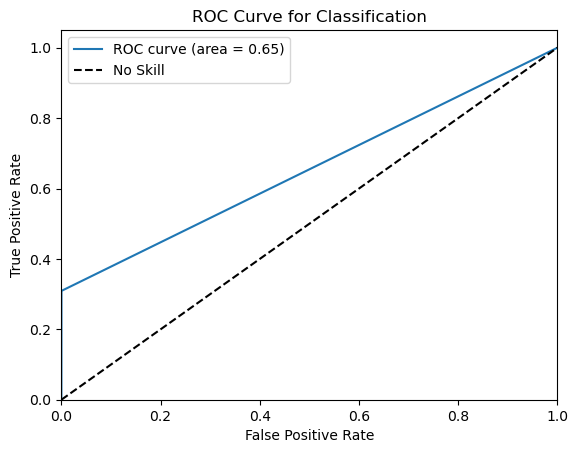

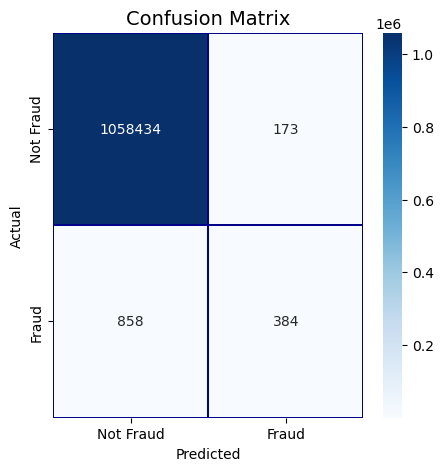

export20241119.csv
test-set confusion matrix:
 [[988416    495]
 [  1006    141]]
accuracy score: 0.9985
balanced accuracy score: 0.5612
recall score: 0.1229
precision score: 0.2217
f1 score: 0.1582
mcc score: 0.1644
roc auc score: 0.5612


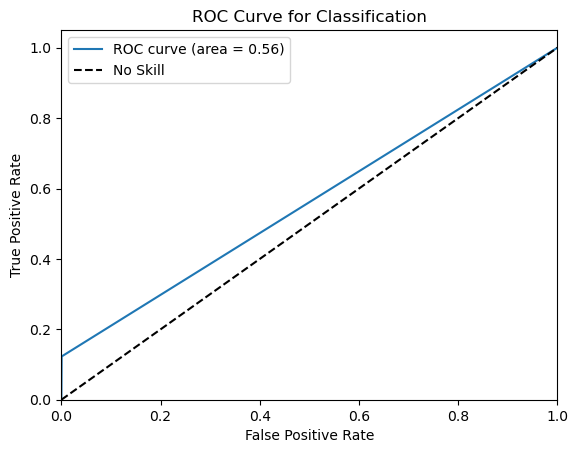

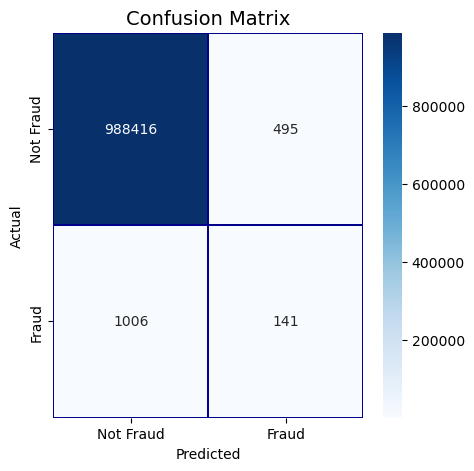

export20241120.csv
test-set confusion matrix:
 [[1066694     430]
 [   1208     110]]
accuracy score: 0.9985
balanced accuracy score: 0.5415
recall score: 0.0835
precision score: 0.2037
f1 score: 0.1184
mcc score: 0.1297
roc auc score: 0.5415


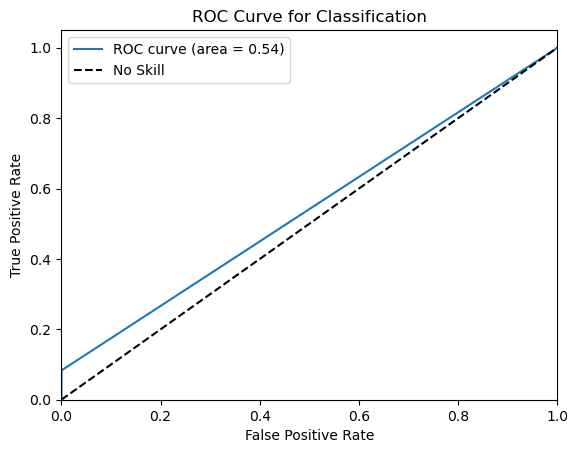

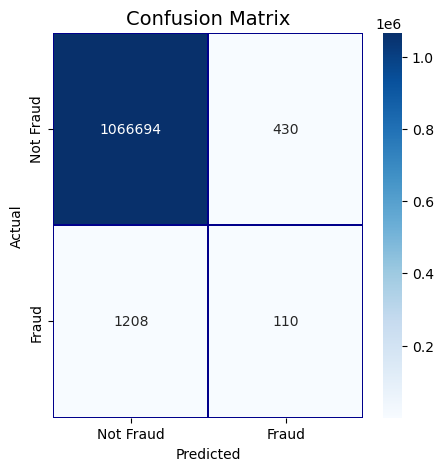

export20241121.csv
test-set confusion matrix:
 [[1074909     375]
 [   1142      72]]
accuracy score: 0.9986
balanced accuracy score: 0.5295
recall score: 0.0593
precision score: 0.1611
f1 score: 0.0867
mcc score: 0.0971
roc auc score: 0.5295


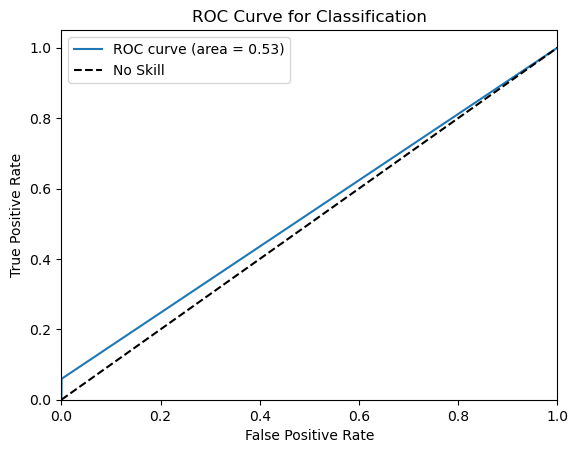

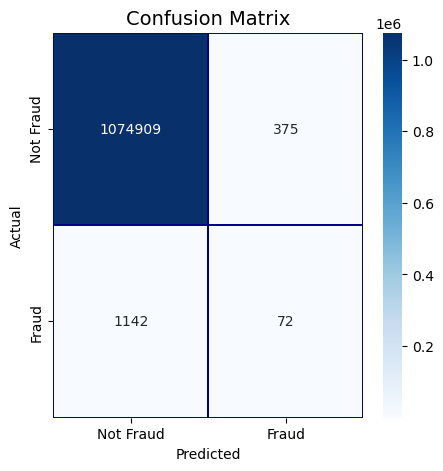

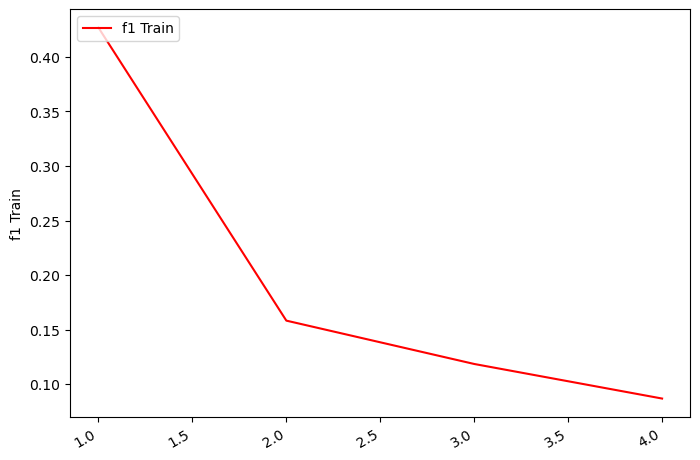

In [10]:
files = fd.getAllFiles()

range = []
f1s = []
rocs = []
loop =0
threshold=0.15
for file in files:
    loop=loop+1
    range.append(loop)
    print(file)
  
    dfTrx = pd.read_csv('../data/cleaned/'+source+file)
    predictors = fd.getPredictors(dfTrx)

    y_pred_prob = modelClf.predict_proba(dfTrx[predictors])[:,1]
    y_pred_adjusted = (y_pred_prob>threshold).astype(int)

    f1,mcc,roc= fd.print_scores(dfTrx['Class'], y_pred_adjusted,'All', True)
    
    #fd.show_importance(modelClf,predictors)
    fd.show_confusion_matrix(dfTrx['Class'], y_pred_adjusted)

    f1s.append(f1)
    rocs.append(roc)

fd.plt_train_test(range, f1s)
resultMd.update_performance_nextdays_result('07-sklearn.ensemble.b-boosting','GradientBoostingClassifier','3-After threshold', f1s[0],f1s[1],f1s[2],f1s[3],rocs[0],rocs[1],rocs[2],rocs[3])

